# Clustering

Step 1: Load the Fashion MNIST Data set 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats 
from math import isclose 
from keras.datasets import fashion_mnist 

In [ ]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train=x_train.reshape(-1,x_train.shape[1]*x_train.shape[2])
x_train=x_train[:5000]
print(x_train.shape)


(5000, 784)


Step 2: Implement the Kmeans class 

<b>Important functions</b>
<br>
-  `Init function`:  Inputs are the data, initialisation method and distance method 
- `euclidean distance` : Takes in a 2D matrix and a vector, and finds the euclidean distances of all the rows from the vector 
- `manhattan distance` : Takes in the same parameters as above, but returns the manhattan distance 
- `forgy method` : Randomly chooses any `k` of the sample data points as the centers for the initial iteration 
- `random paritition` : Randomly allocates a cluster to each of the data points. The initialises the centers as the centroids of each of these clusters 
- `train` : Updates the centers `niter` number of times.
- `sos_within_cluster`: It returns the sum of all the distances of each data point from its respective centroid. 

In [ ]:
from random import randint
import numpy as np
class Kmeans:

  def __init__(self,k,data,niter,center_init,dist_method):
    self.k=k
    self.data=data
    self.niter=niter
    self.center_init=center_init
    self.dist_method=dist_method
    self.centers=None 
    self.num_datapts,self.features=data.shape
    
  def euclidean_distance(self, X, centre):
    return np.sqrt(np.sum((X - centre) ** 2, axis=1))
  
  def manhattan_distance(self, X, centre):
    return np.sum(np.abs(X - centre), axis = 1)
  
  def forgy(self):
    rnd_indices = np.random.randint(self.features, size=self.k)
    self.centers=self.data[rnd_indices,:]
  
  def random_part(self):
    rnd_indices = np.random.choice(range(0, self.k), replace=True, size=self.features)
    centers = []
    for center in range(self.k):
        centers.append(self.data[rnd_indices == center].mean(axis=0))
    self.centers=np.concatenate([val[ None, :] for val in centers], axis = 0)
    
  def train(self):
    
    if self.center_init=="rndp":
        self.random_part()
    else:
        self.forgy()
      
    for i in range(self.niter):
        new_distances=None
        distances=None
        for center in range(self.k):
            if self.dist_method=="eu": 
                new_distances=self.euclidean_distance(self.data, self.centers[center])
            else:
                new_distances=self.manhattan_distance(self.data, self.centers[center])
            if(center==0):
                distances=new_distances
            else:
                distances = np.c_[distances,new_distances]

        cluster_assignment = np.argmin(distances, axis=1)

        for center in range(self.k):
            cluster_i = np.argwhere(cluster_assignment == i)
            cluster_data = self.data[cluster_i].reshape((cluster_i.shape[0], 784))
            self.centers[center] = np.mean(cluster_data, axis=0)
    
  def sos_within_cluster(self):
    distances=None
    for center in range(self.k):
        new_distances=self.euclidean_distance(self.data, self.centers[center])
        if(center==0):
            distances=new_distances
        else:
            distances=distances = np.c_[distances,new_distances]
    min_dist = np.min(distances, axis=1)
    return np.sum(min_dist)
  
      
kmeans = Kmeans(k=4,data=x_train, niter=200,center_init="forgy",dist_method="eu")
kmeans.train()
print(kmeans.sos_within_cluster())

Centre shape (4, 784)
K means completed
14058824983.719261


Centre shape (1, 784)
K means completed
Centre shape (2, 784)
K means completed
Centre shape (3, 784)
K means completed
Centre shape (4, 784)
K means completed
Centre shape (5, 784)
K means completed
Centre shape (6, 784)
K means completed
Centre shape (7, 784)
K means completed
Centre shape (8, 784)
K means completed
Centre shape (9, 784)
K means completed
Centre shape (10, 784)
K means completed
Centre shape (11, 784)
K means completed
Centre shape (12, 784)
K means completed
Centre shape (13, 784)
K means completed
Centre shape (14, 784)
K means completed
Centre shape (15, 784)
K means completed
Centre shape (16, 784)
K means completed
Centre shape (17, 784)
K means completed
Centre shape (18, 784)
K means completed
Centre shape (19, 784)
K means completed
Centre shape (20, 784)
K means completed
Centre shape (21, 784)
K means completed
Centre shape (22, 784)
K means completed
Centre shape (23, 784)
K means completed
Centre shape (24, 784)
K means completed


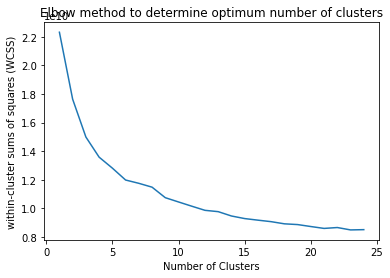

In [ ]:
from matplotlib import pyplot as plt
max_cluster = 25
clusters=range(1,max_cluster)
sos_within_cluster = []
for i in clusters:
    kmeans = Kmeans(k=i,data=x_train, niter=200,center_init="forgy",dist_method="eu")   
    kmeans.train()
    sos_within_cluster.append(kmeans.sos_within_cluster())

plt.plot(clusters, sos_within_cluster)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

# Results 

1. No significant chnages were observed in using any of the initialisation methods. 
2. I noticed that the results, when using Manhattan Distance were a little more noisy than when using Euclidean distance. 

# Hierarchial Clustering 

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering
from keras.datasets import fashion_mnist 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
X=x_train.reshape(-1,x_train.shape[1]*x_train.shape[2])
X=X[:5000]
print(X.shape)

(5000, 784)


Text(0.5, 0, 'Number of points in node (or index of point if no parenthesis).')

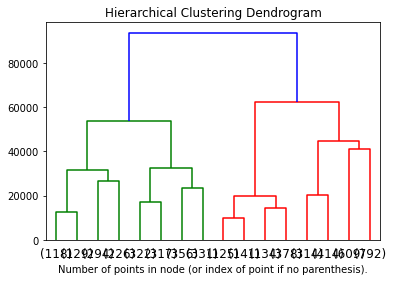

In [ ]:
def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

Question: Explain the Procedure to find the optimal number of clusters using dendrogram.

Answer: In the dendrogram locate the largest vertical difference between the nodes, and in the middle pass an horizontal line, which acts as the threshold. Now to determine the number of clusters find the number of vertical lines intersecting the horizontal line. 

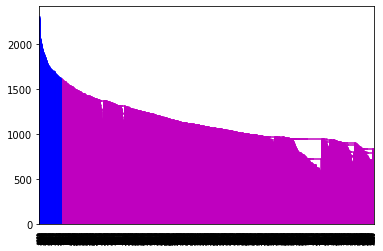

In [ ]:
import sys
sys.setrecursionlimit(15000)
# If I dont include the above line, then I get a stack overflow error
Z = linkage(X, 'single')
dn = dendrogram(Z)

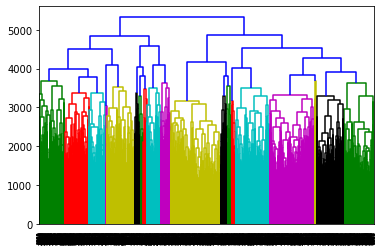

In [ ]:
Z = linkage(X, 'complete')
dn = dendrogram(Z)

Question: Mention the differences observed using single and complete linkage.

Answer: In a single linkage the clusters are more spread out and not well defined, as we can see from the plot above. Also single linkage took more time than complete linkage 
Complete linkage, the clusters are wee defined and can be distinguished as seen in the plot. The clusters produced are tighter. 